<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TFDS/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Data Services

In this notebook we will take a look at the simple Hello World scenario of TensorFlow Datasets (TFDS). We'll use TFDS to perform the extract, transform, and load processes for the MNIST dataset.

### Setup

We'll start by importing TensorFlow, TensorFlow Datasets, and Matplotlib.

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Extract - Transform - Load (ETL)

Now we'll run the **ETL** code. First, to perform the **Extract** process we use `tfts.load`. This handles everything from downloading the raw data to parsing and splitting it, giving us a dataset. Next, we perform the **Transform** process. In this simple example, our transform process will just consist of shuffling the dataset. Finally, we **Load** one record by using the `take(1)` method. In this case, each record consists of an image and its corresponding label. After loading the record we proceed to plot the image and print its corresponding label.

In [ ]:
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset by downloading and extracting
dataset = tfds.load(name='mnist', split='train')
# Transform
dataset = dataset.shuffle(buffer_size=NUM_SAMPLES) # buffer size
dataset = dataset.repeat(count=NUM_EPOCHS)
dataset = dataset.map(map_func=lambda x: ...)
dataset = dataset.batch(batch_size=BATCH_SIZE)
# Load
iterator = dataset.take(count=10) # To fetch 10 samples from the dataset
for data in iterator:
    # Acess data and use it

In [ ]:
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset from MNIST
dataset = tfds.load(name='mnist')
dataset

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


{'test': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 'train': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset from MNIST
dataset = tfds.load(name='mnist', split='train')
# Inspecting shapes and datatypes
print(dataset.element_spec)
# Checking if the dataset is an instance of tf.data.Dataset
assert isinstance(dataset, tf.data.Dataset)

{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}


In [ ]:
import tensorflow_datasets as tfds

print(tfds.list_builders()[:10])

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence']


In [ ]:
import tensorflow_datasets as tfds

mnist, info = tfds.load(name="mnist", with_info=True)
print(info)
print("Data dir: ", info.data_dir)
print("Image features: ", info.features['image'])
print("Label features: ", info.features['label'])
print("Number of training examples ", \
    info.splits['train'].num_examples)
print("Number of test examples ", \
    info.splits['test'].num_examples)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)
Data dir:  /r

In [ ]:
import tensorflow_datasets as tfds

dataset = tfds.load(name="mnist", as_supervised=True)
# Inspecting shapes of a batch
for image, label in dataset['train'].take(count=1):
    print(image.shape, label.shape)

(28, 28, 1) ()


In [ ]:
import tensorflow_datasets as tfds

ds = tfds.load(name='coco', split=tfds.Split('test2015'))
ds.element_spec

In [ ]:
import tensorflow_datasets as tfds

# Pick dataset
mnist_builder = tfds.builder(name="mnist")
# Download
mnist_builder.download_and_prepare()
# Extract dataset
mnist_builder.as_dataset(split='train')
mnist_builder

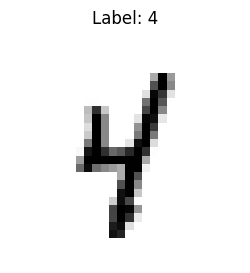

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# EXTRACT
dataset = tfds.load(name="mnist", split='train')

# TRANSFORM
dataset.shuffle(buffer_size=100)

# LOAD
for data in dataset.take(count=1):
    image = data["image"].numpy().squeeze()
    label = data["label"].numpy()

    plt.figure(figsize=(3, 3))
    plt.imshow(X=image, cmap=plt.cm.binary)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

## Fashion MNIST

In [1]:
import tensorflow_datasets as tfds

(train_images, train_labels), (test_images, test_labels) = \
    tfds.as_numpy(dataset=tfds.load(name="fashion_mnist",
        split=['train', 'test'], batch_size=-1, as_supervised=True))

print(f"x_train shape: {train_images.shape}, "\
    f"y_train shape: {train_labels.shape}")
print(f"x_test shape: {test_images.shape}, "\
    f"y_test shape: {test_labels.shape}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKXLO48/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKXLO48/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
x_train shape: (60000, 28, 28, 1), y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000,)


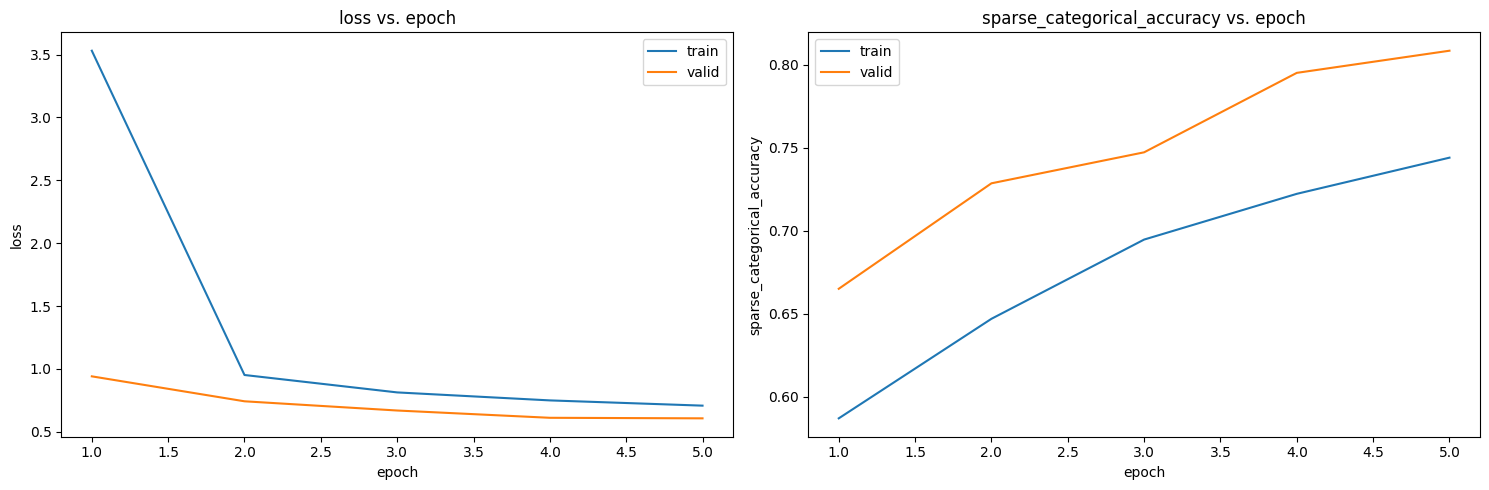

test loss: 0.62, test accuracy: 0.80


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(units=128,
        activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10,
        activation=tf.keras.activations.softmax)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

history = model.fit(x=train_images, y=train_labels, validation_split=0.1,
    epochs=5, batch_size=64, verbose=0)

df_history = pd.DataFrame(data=history.history, index=history.epoch)
metrics = ['loss', 'sparse_categorical_accuracy']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history, label='train',
        x=df_history.index+1, y=metric)
    try:
        sns.lineplot(ax=ax, data=df_history, label='valid',
            x=df_history.index+1, y=f'val_{metric}')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel(xlabel='epoch')
    ax.set_ylabel(ylabel=f'{metric}')
    ax.set_title(label=f"{metric} vs. epoch")
fig.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)
print(f"test loss: {test_loss:.2f}, test accuracy: {test_acc:.2f}")

## Horses or Humans

In [1]:
import tensorflow_datasets as tfds

train_ds = tfds.load(name='horses_or_humans', split='train',
    as_supervised=True)
print("Number of train samples: ", len(list(train_ds)))
print(train_ds.element_spec)
train_batches = train_ds.shuffle(buffer_size=100).batch(batch_size=10)

val_ds = tfds.load(name='horses_or_humans', split='test',
    as_supervised=True)
print("Number of test samples:", len(list(val_ds)))
print(val_ds.element_spec)
validation_batches = val_ds.batch(batch_size=32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteEYV7T7/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteEYV7T7/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
Number of train samples:  1027
(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
Number of test samples: 256
(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


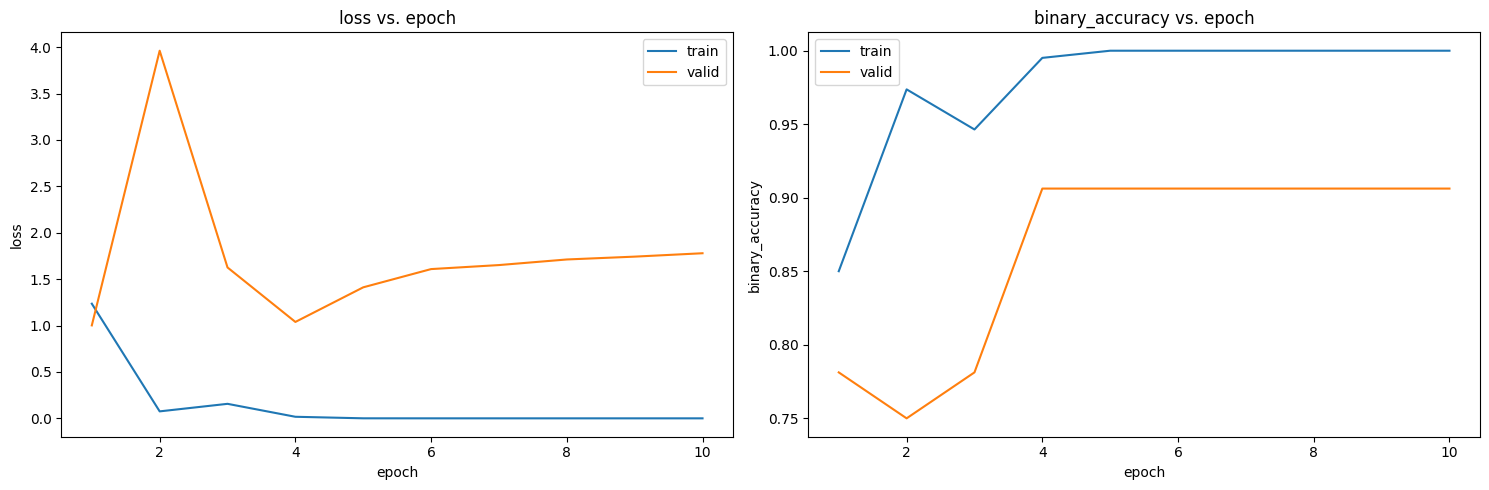

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
        activation=tf.keras.activations.relu,
        input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
        activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
        activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
        activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
        activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512,
        activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1,
        activation=tf.keras.activations.sigmoid)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

history = model.fit(x=train_batches, validation_data=validation_batches,
    validation_steps=1, epochs=10, verbose=0)

df_history = pd.DataFrame(data=history.history, index=history.epoch)
metrics = ['loss', 'binary_accuracy']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()